In [ ]:
import spacy
import matplotlib.pyplot as plt
import json
from itertools import islice

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
#im gonna add a note here that we do need these dates to plot for part 5
def remove_dates(data):
  missing_dates = ['03-1-22', '03-2-22', '03-3-22', '03-4-22', '03-5-22', '03-6-22', '03-7-22', '03-8-22', '03-9-22', '03-10-22', '03-11-22', \
                   '3-1-22', '3-2-22', '3-3-22', '3-4-22', '3-5-22', '3-6-22', '3-7-22', '3-8-22', '3-9-22', '3-10-22', '3-11-22', '03-31-22']
  for key in missing_dates:
    if key in data.keys():
      data.pop(key)
  return data

#Initalize Texts
fox_text = ''
cnn_text = ''
aljazeera_text = ''
total_text = ''

#FOX
with open('fox_images_ocr.json') as f:
   data = json.load(f)
data = remove_dates(data)
for key, val in data.items():
  fox_text = fox_text + val
total_text += fox_text
#print(data['03-12-22'])
print(len(fox_text))

#CNN
with open('cnn_images_ocr.json') as f:
   data = json.load(f)
data = remove_dates(data)
for key, val in data.items():
  cnn_text = cnn_text + val
total_text += cnn_text
print(len(cnn_text))

#ALJAZEERA
with open('aljazeera_images_ocr.json') as f:
   data = json.load(f)
data = remove_dates(data)
for key, val in data.items():
  aljazeera_text = aljazeera_text + val
total_text += aljazeera_text
print(len(aljazeera_text))
print(len(total_text))

nlp.max_length = len(total_text) + 100


716724
1258750
993561
2969035


In [ ]:
def NER_extract(text):
  #PERSON, NORP, FAC, ORG, GPE, LOC, PRODUCT, EVENT, DATE and TIME
  entity_dict = dict()
  entity_dict["PERSON"] = []
  entity_dict["NORP"] = []
  entity_dict["ORG"] = []
  entity_dict["GPE"] = []
  entity_dict["LOC"] = []
  entity_dict["FAC"] = []
  entity_dict["PRODUCT"] = []
  entity_dict["EVENT"] = []
  entity_dict["DATE"] = []
  entity_dict["TIME"] = []

  doc = nlp(text)

  for entity in doc.ents:
    if entity.label_ not in ["PERSON","NORP","FAC","ORG","GPE","LOC","PRODUCT","EVENT","DATE","TIME"]:
      pass
    else:
      entity_dict[entity.label_].append(entity.text)

  return entity_dict

#Return first n items of the iterable as a list
def take(n, iterable):
    return list(islice(iterable, n))

def remove_duplicate(sorted_dict):
    sorted_keys = list(sorted_dict.keys())
    sorted_values = list(sorted_dict.values())
    remove_keys = []
    for i in range(len(sorted_dict.keys())):
      for j in range(i + 1, len(sorted_dict.keys())):
        if sorted_keys[i][0:5] in sorted_keys[j]:
          if sorted_keys[j] not in remove_keys:
            remove_keys.append(sorted_keys[j])
          sorted_dict[sorted_keys[i]] = sorted_values[i] + sorted_values[j]
    for rem in remove_keys:
      sorted_dict.pop(rem)
    return sorted_dict


In [ ]:
def plot_entity(text):
  ind = 1
  fig = plt.figure(figsize=(30, 40))
  plt.suptitle('Figure 4 - Total', y=0.91, fontsize = 20)
  entity_dict = NER_extract(text)
  for key, val in take(5, entity_dict.items()):
    freq_dict = dict()
    sorted_dict = dict()
    for item in val:
      if item in freq_dict:
        freq_dict[item] += 1
      else:
        freq_dict[item] = 1

    sorted_dict = dict(sorted(freq_dict.items(), key=lambda item: item[1], reverse=True))
    sorted_dict = remove_duplicate(sorted_dict)
    sorted_dict = dict(islice(sorted_dict.items(), 20)) 
    plt.subplot(5, 1, ind)
    plt.bar(list(sorted_dict.keys()), list(sorted_dict.values()))
    plt.title(key)
    plt.xlabel('Entity Text')
    plt.ylabel('Frequency')
    ind += 1

  plt.show()


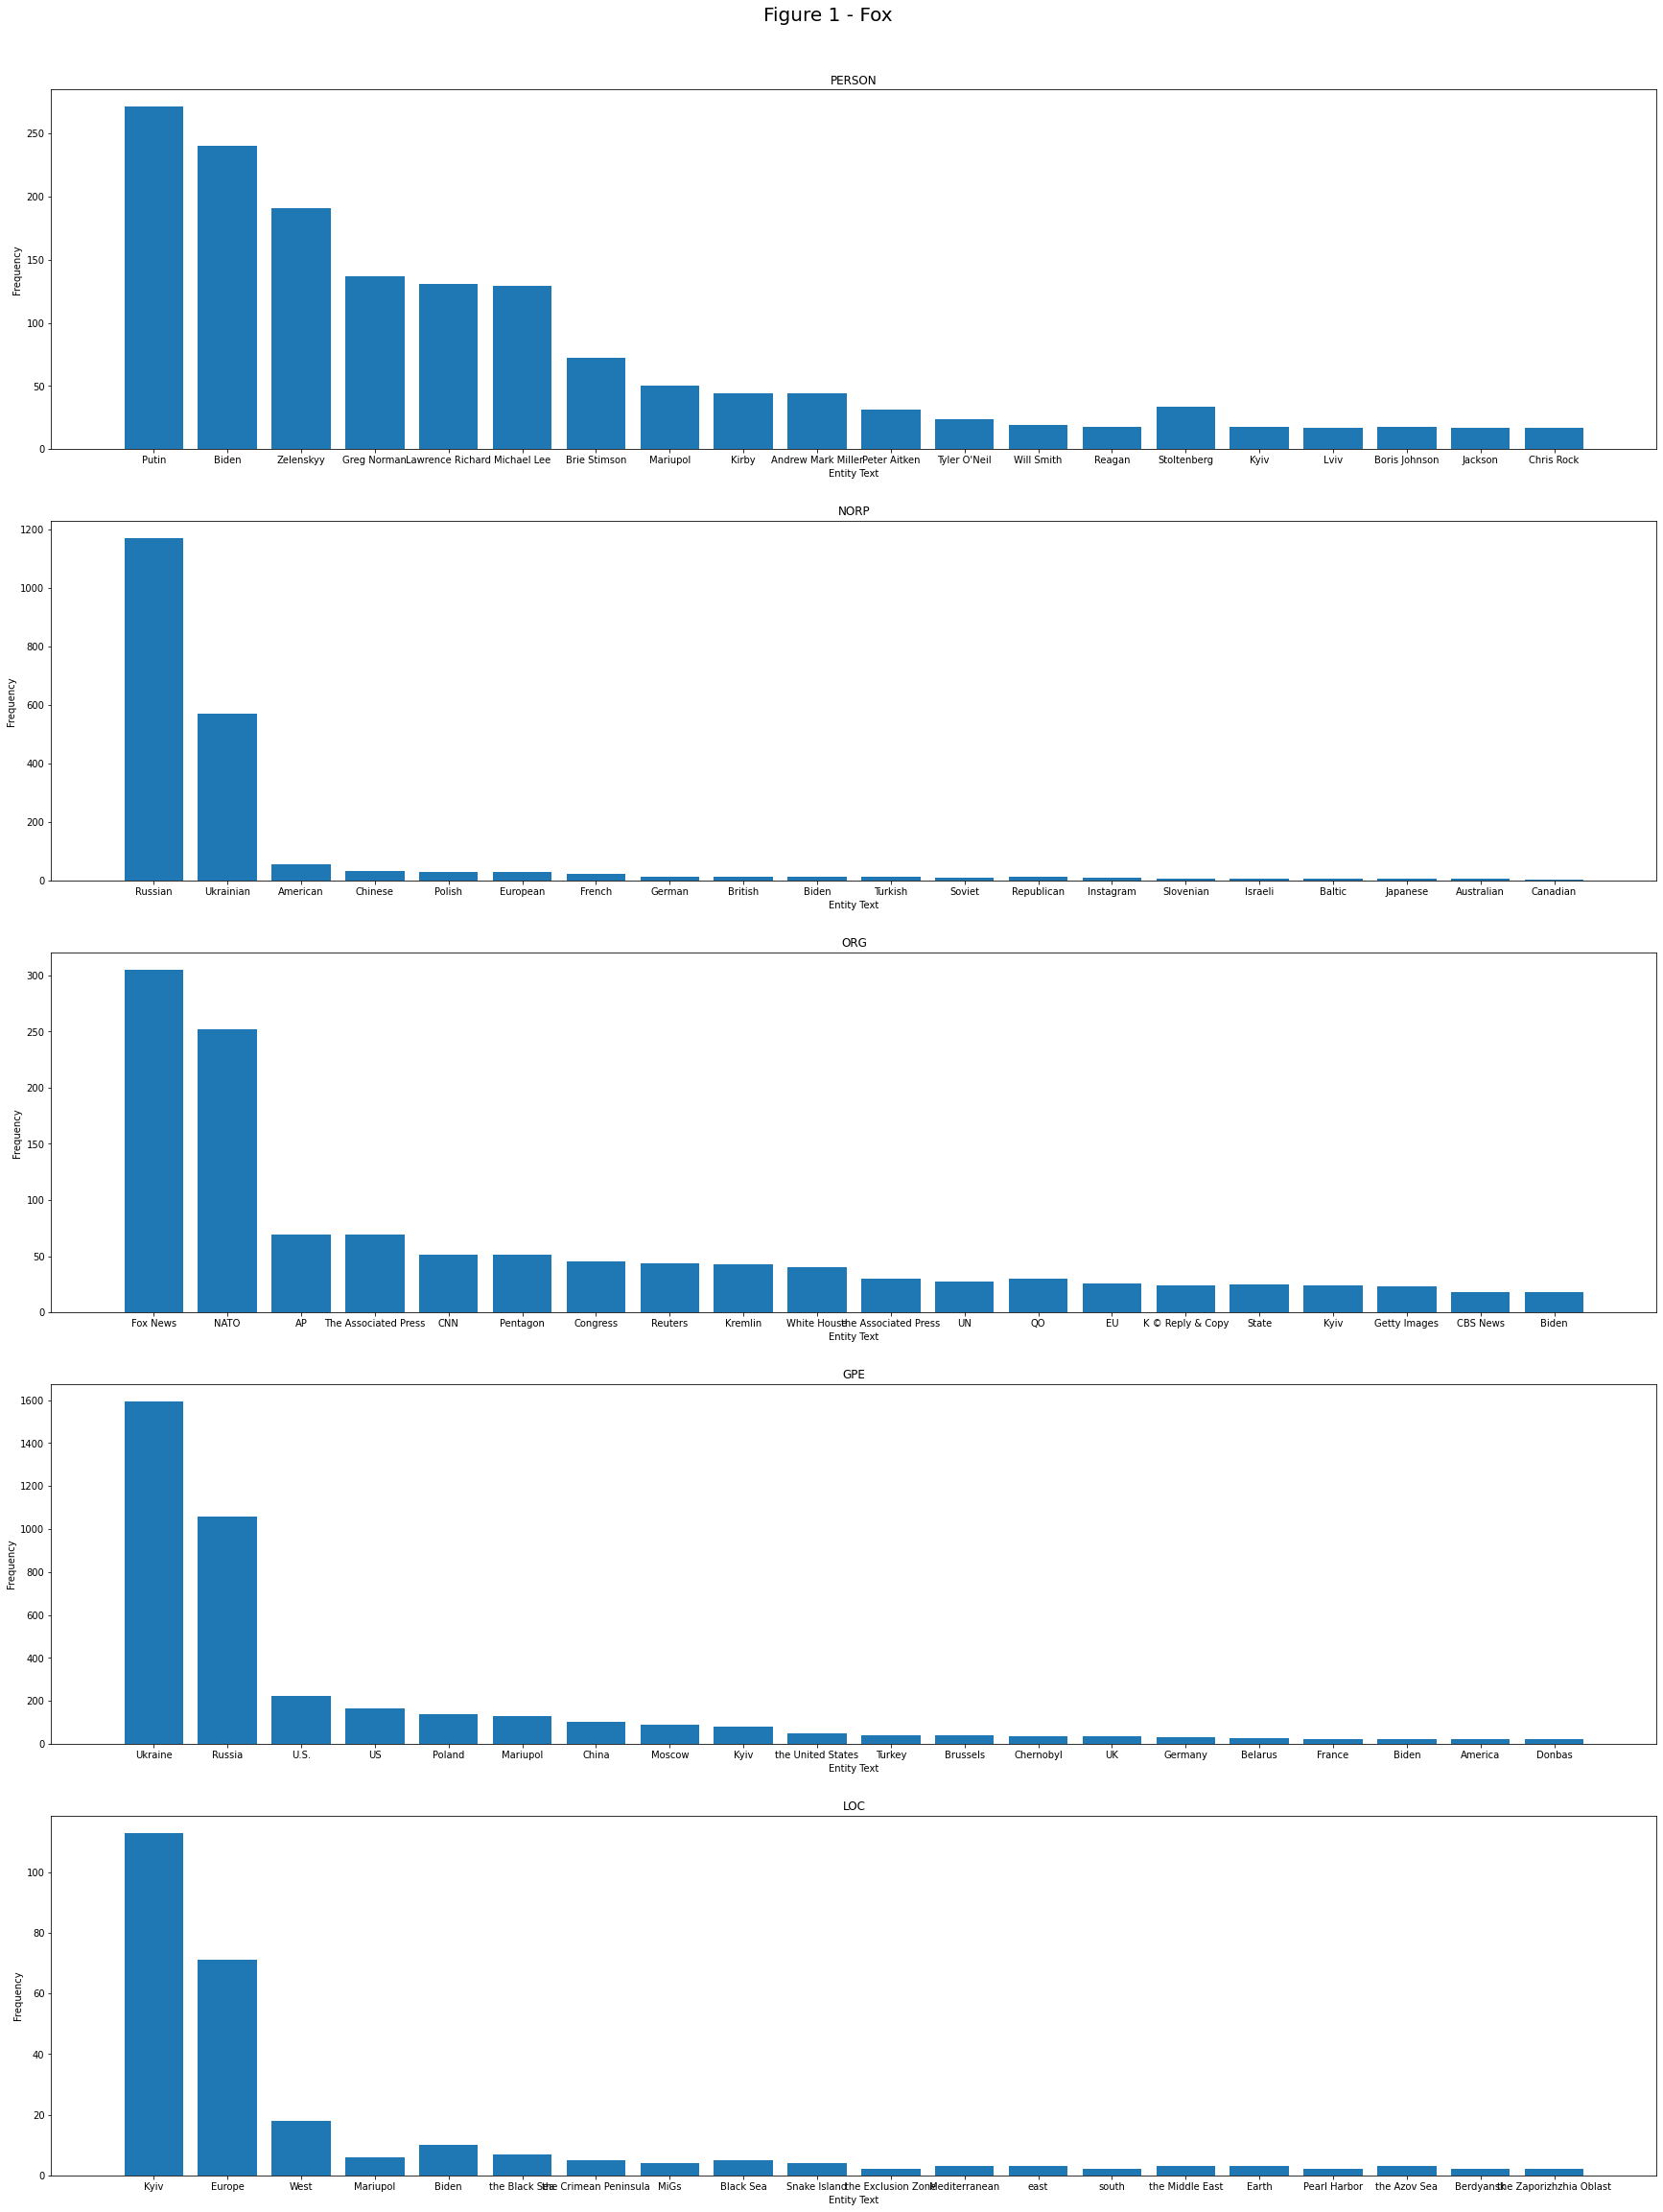

In [ ]:
plot_entity(fox_text)

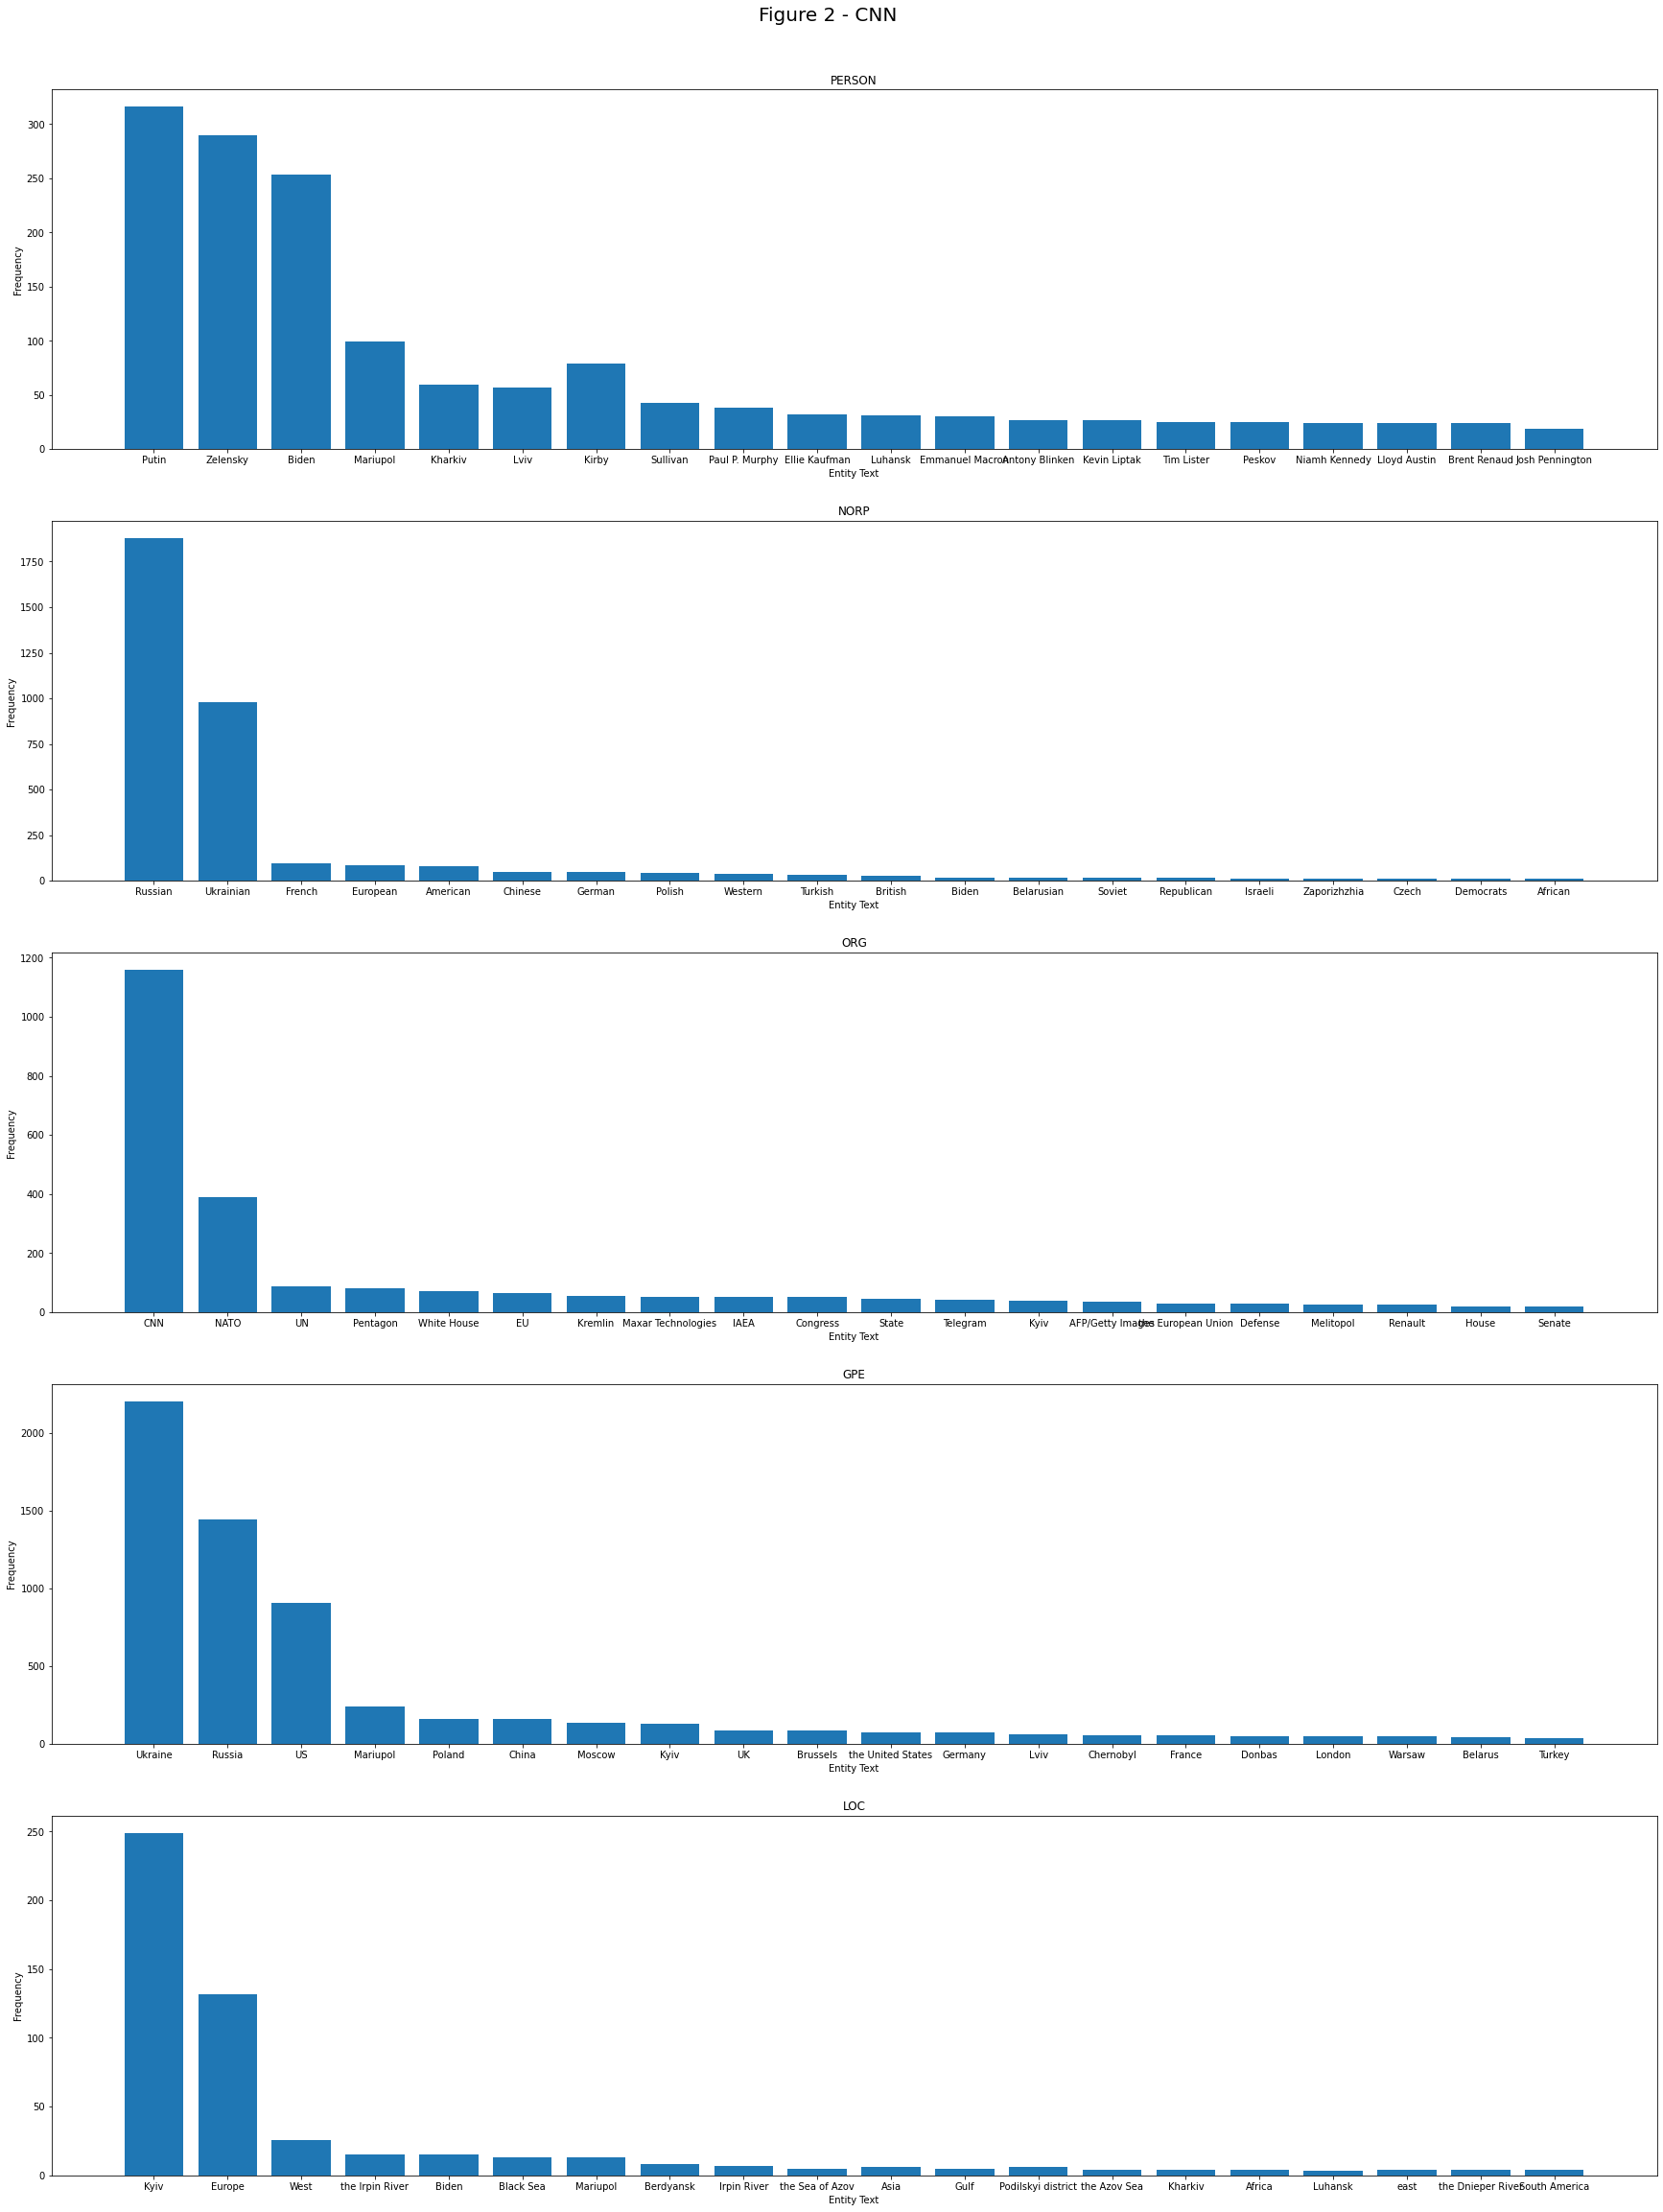

In [ ]:
plot_entity(cnn_text)

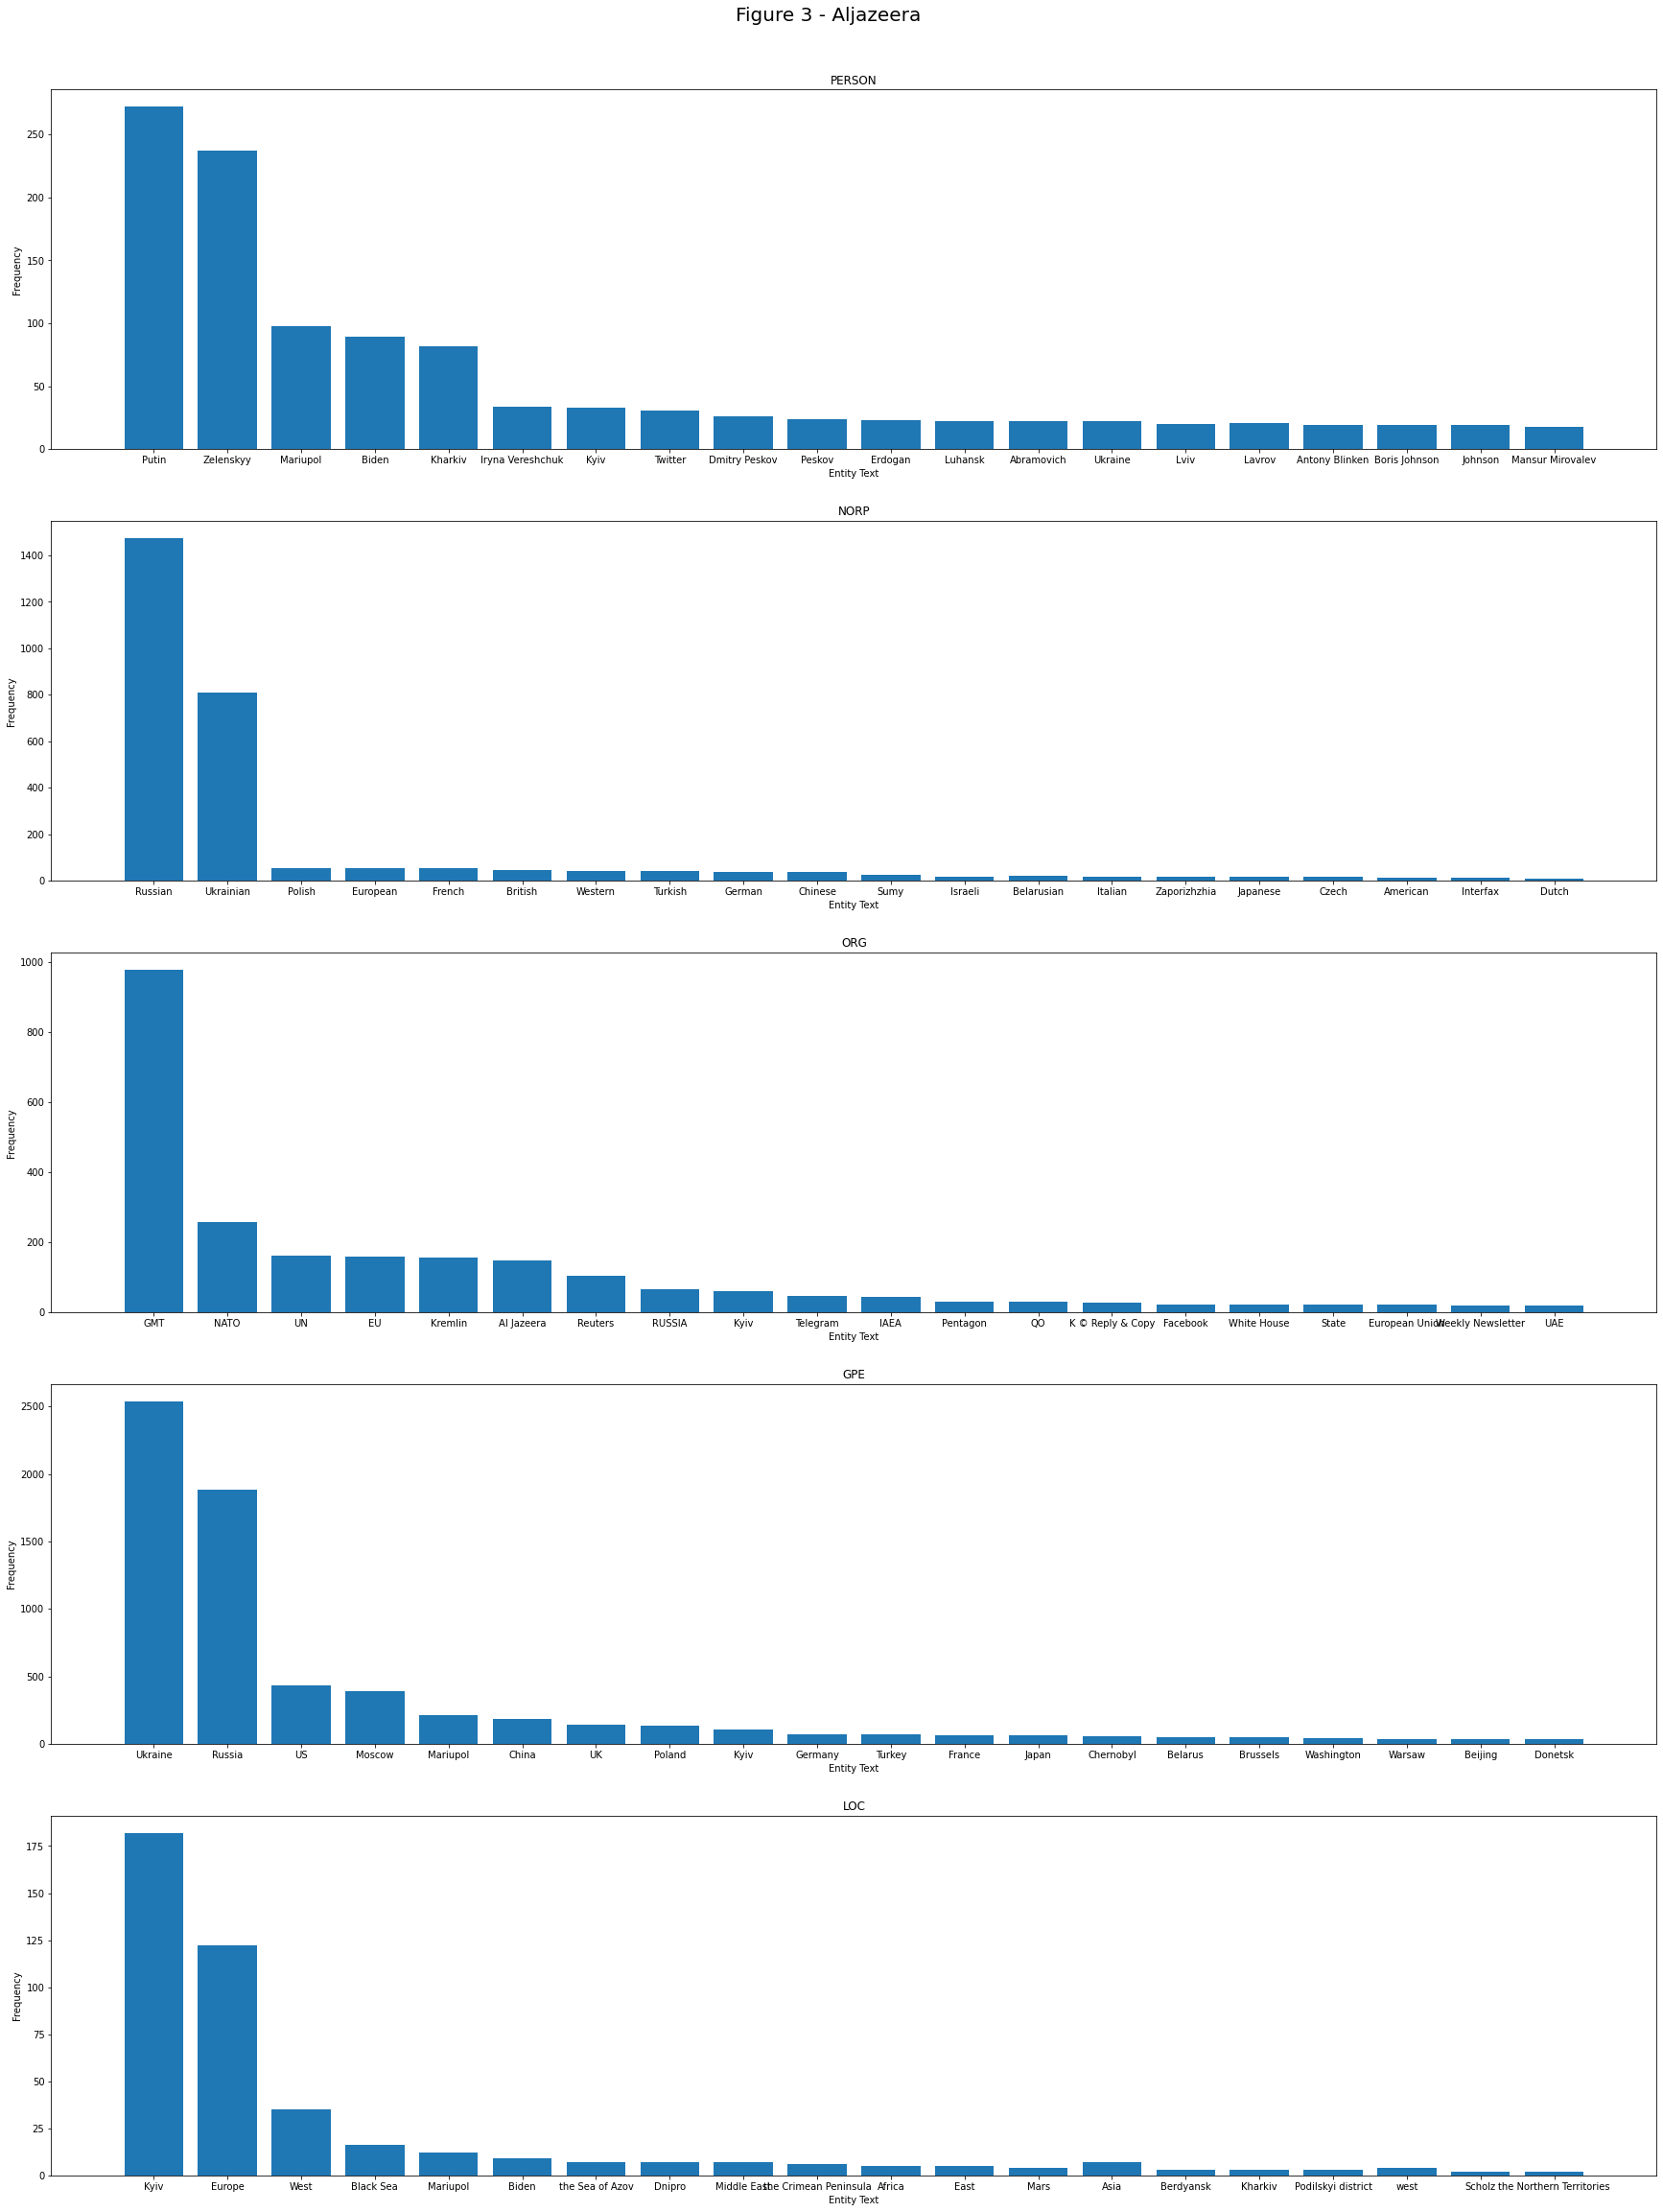

In [ ]:
plot_entity(aljazeera_text)

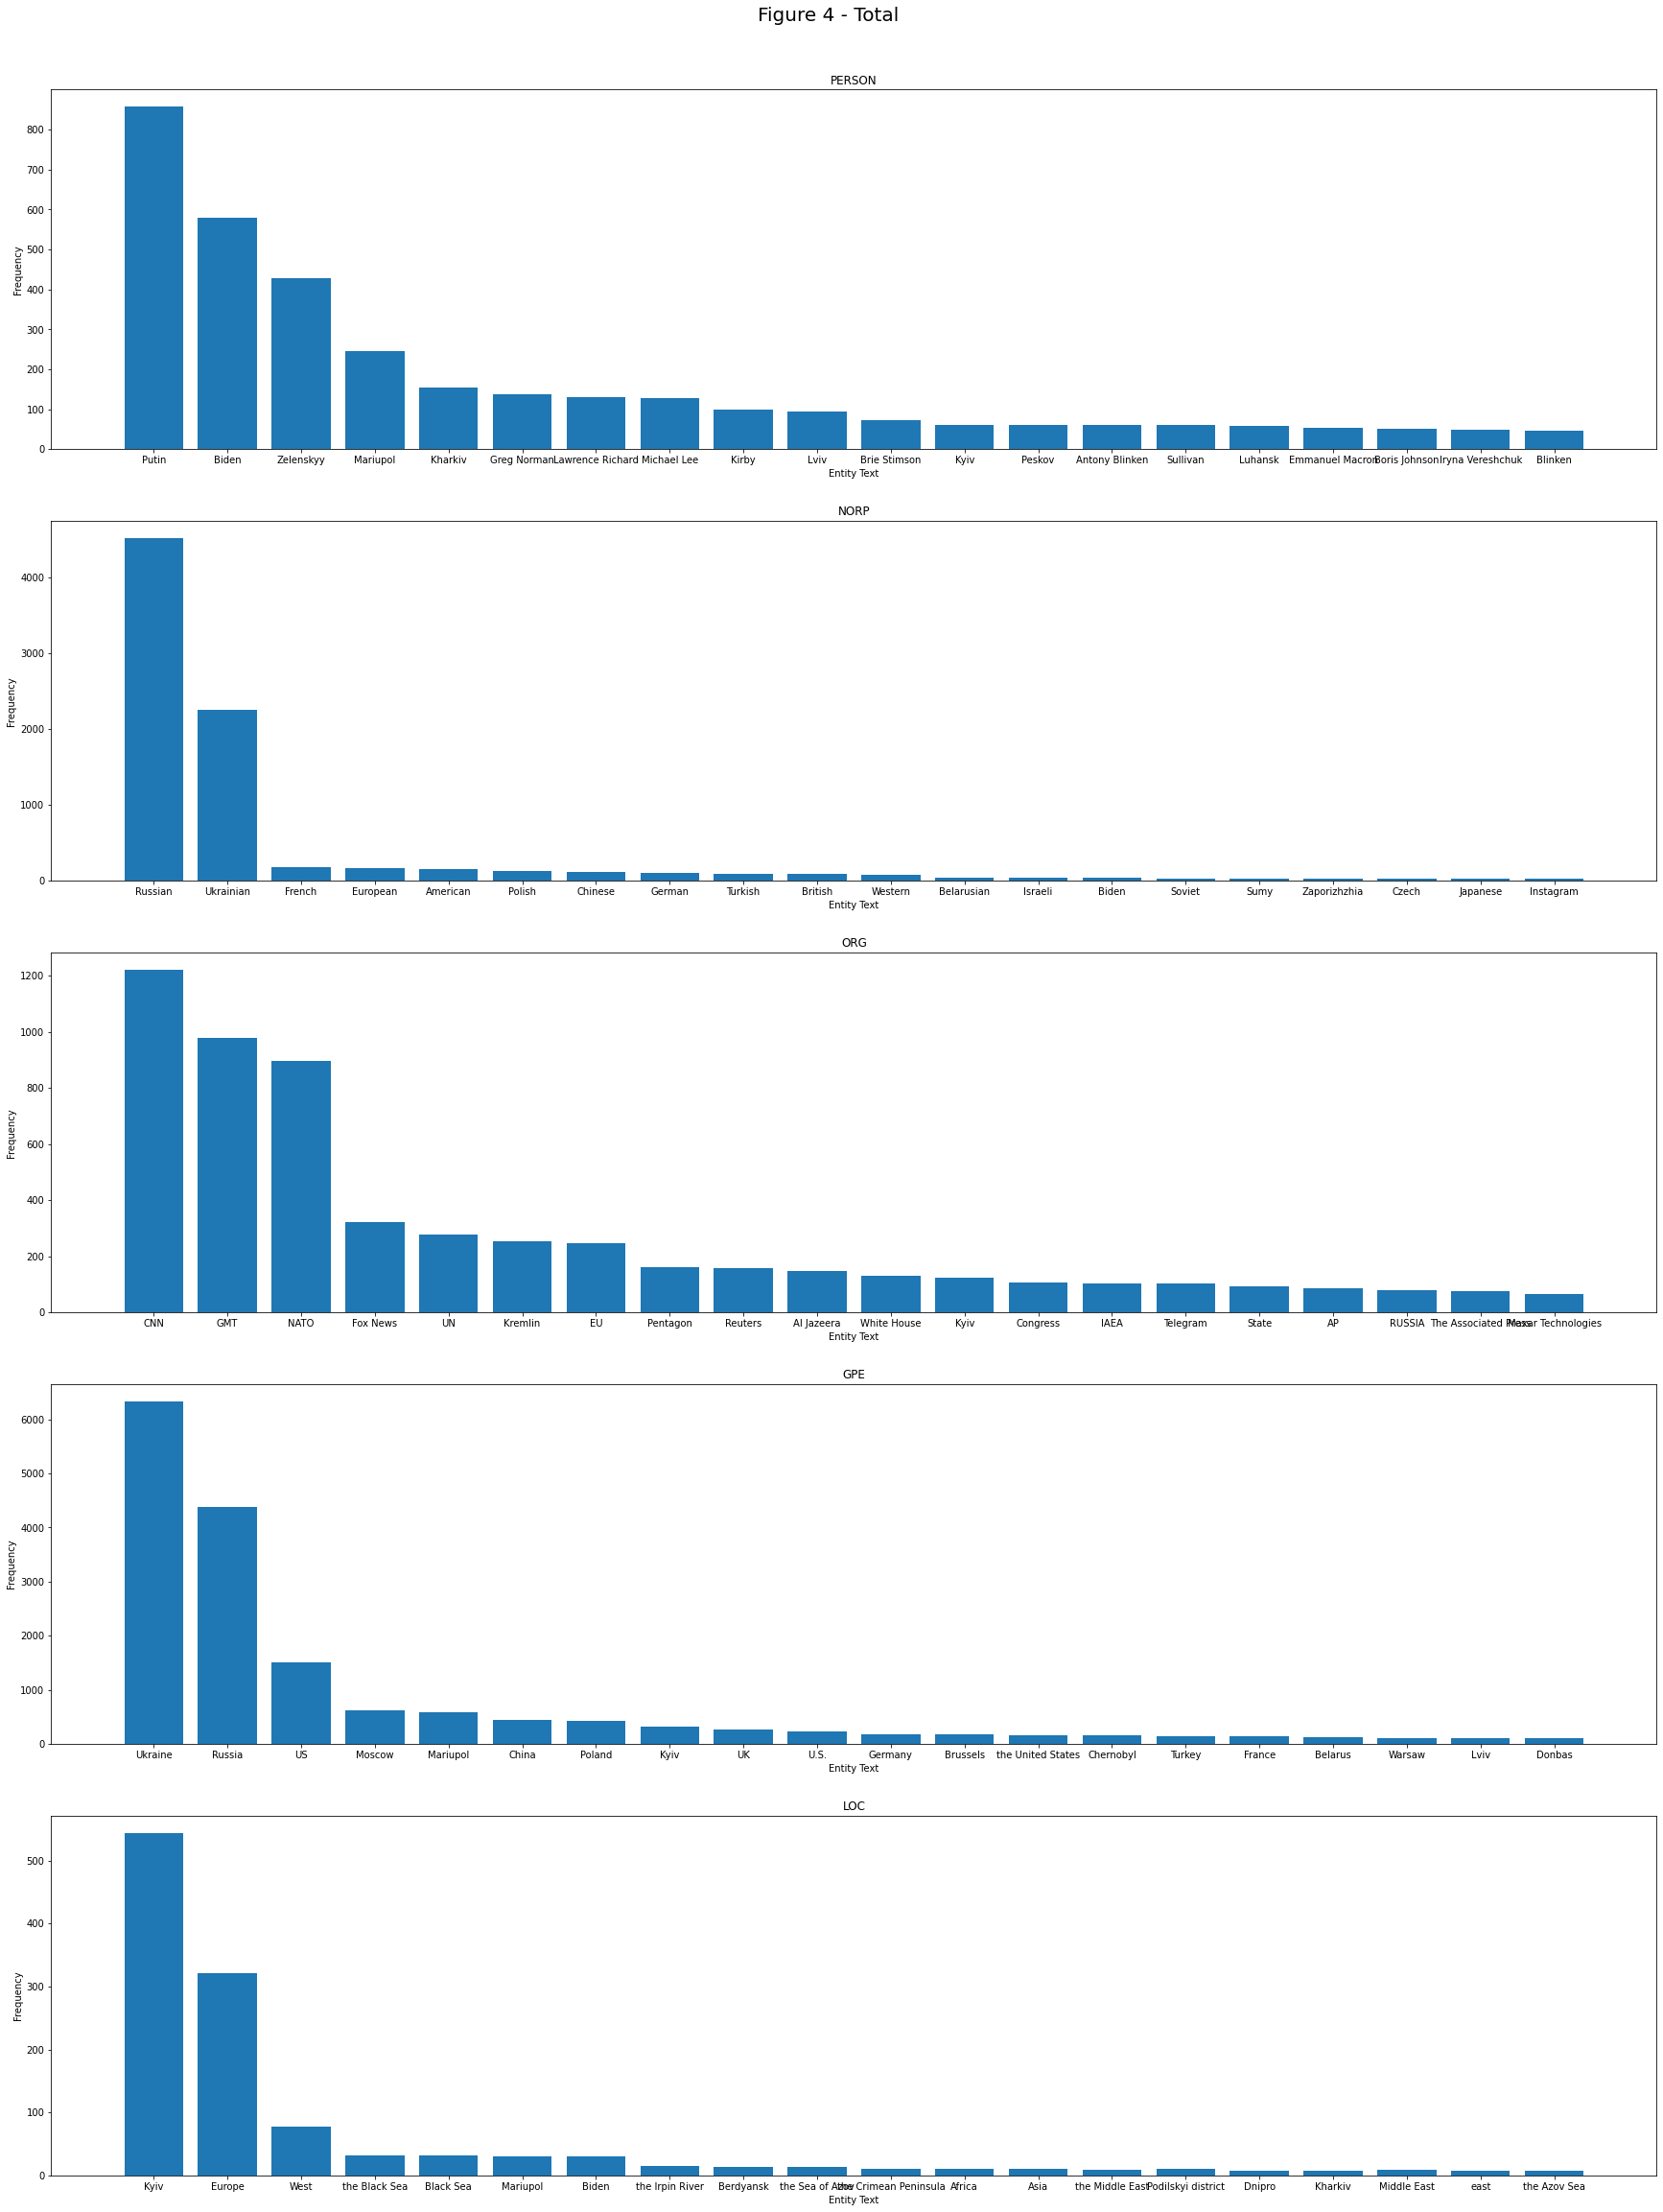

In [ ]:
plot_entity(total_text)

In [ ]:
pip install geopy

In [ ]:
pip install plotly

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 10.4 MB/s 
     |████████████████████████████████| 6.3 MB 37.8 MB/s 
     |████████████████████████████████| 16.7 MB 351 kB/s 


In [ ]:
import plotly.graph_objects as go
import plotly as py
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.geocoders import Photon
import geopandas